In [212]:
import pandas as pd
import numpy as np
import math
from scipy import stats as st
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression	
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve
plt.style.use('ggplot')

Importing the data

In [213]:
gold_data_full = pd.read_csv('/Users/leahdeyoung/Desktop/GitHub/zyfra-gold-recovery/gold_recovery_full.csv', encoding = "utf-8")
gold_data_test = pd.read_csv('/Users/leahdeyoung/Desktop/GitHub/zyfra-gold-recovery/gold_recovery_test.csv', encoding = "utf-8")
gold_data_train = pd.read_csv('/Users/leahdeyoung/Desktop/GitHub/zyfra-gold-recovery/gold_recovery_train.csv', encoding = "utf-8")


Viewing the data and the information about it

In [214]:
display(gold_data_full.head())
gold_data_full.info()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [215]:
display(gold_data_train.head())
gold_data_train.info()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [216]:
display(gold_data_test.head())
gold_data_test.info()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

1.2. Check that recovery is calculated correctly. Using the training set, calculate recovery for the rougher.output.recovery feature. Find the MAE between your calculations and the feature values. Provide findings.

In [217]:
def recovery(df, column_1, column_2, column_3):
    c = df[column_1]
    f = df[column_2]
    t = df[column_3]
    recovery_calculated = ((c * (f-t)) / (f * (c-t))) * 100
    recovery_calculated = pd.DataFrame(recovery_calculated, columns={'recovery'})
    recovery_calculated['recovery'] = recovery_calculated['recovery'].where(recovery_calculated['recovery'] != np.inf, recovery_calculated['recovery'].mean()) 
    recovery_calculated.loc[recovery_calculated['recovery'] == float('-inf'), 'recovery'] = np.nan
    recovery_calculated.fillna(recovery_calculated['recovery'].mean(), inplace=True)
    filled_recovery_calculated = recovery_calculated['recovery']
    
    return filled_recovery_calculated
    

In [218]:
rougher_recovery_calculated = recovery(gold_data_train, 'rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au')
final_recovery_calculated = recovery(gold_data_train, 'final.output.concentrate_au', 'rougher.output.concentrate_au', 'final.output.tail_au')
rougher_recovery_feature = gold_data_train['rougher.output.recovery'].fillna(0)
final_recovery_feature = gold_data_train['final.output.recovery'].fillna(0)

median_rougher_recovery = pd.Series(gold_data_train['rougher.output.recovery'].median(), index=rougher_recovery_calculated.index)
median_final_recovery = pd.Series(gold_data_train['final.output.recovery'].median(), index=final_recovery_calculated.index)
 

rougher_mae = mean_absolute_error(rougher_recovery_feature, rougher_recovery_calculated)
median_rougher_mae = mean_absolute_error(median_rougher_recovery, rougher_recovery_calculated)

final_mae = mean_absolute_error(final_recovery_feature, final_recovery_calculated)
median_final_mae = mean_absolute_error(median_final_recovery, final_recovery_calculated)


print('Rougher recovery MAE is', rougher_mae)
print('Median rougher recovery MAE is', median_rougher_mae)
print('Final recovery MAE is', final_mae)
print('Median final recovery MAE is', median_final_mae)

Rougher recovery MAE is 53.044904557811456
Median rougher recovery MAE is 62.920845030462324
Final recovery MAE is 193.5312395398005
Median final recovery MAE is 198.95549502344412


1.3. Analyze the features not available in the test set. What are these parameters? What is their type?

In [219]:
gold_data_test.info()
gold_data_train.info()
gold_data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

Upon comparison, it appears that all of the final stage features are missing from the test set, as well as any output features. In addition, the rougher "calculation" features are missing. These features are going to be important to both the EDA and machine learning models that will be created in the next steps, so the test data will be disregarded going forward unless specifically requested. In addition, the full set of data will be used unless a different set is specifically requested.

1.4. Perform data preprocessing.

In [220]:
def check_replace_duplicates_nulls(df):
    df['date'] = pd.to_datetime(df['date'])
    print(df.duplicated().sum())
    print(df.isna().sum())
    try:
        for column in df:
            if df[column].dtype != 'object':
                df[column] = df[column].where((df[column].notna()), df[column].mean()) 
    except TypeError:
        print(f"Error occurred in column: {column}")
    except ValueError:
        print(f"Error occurred in column: {column}")
    print(df.isna().sum())
    return
    

In [221]:
check_replace_duplicates_nulls(gold_data_full)

0
date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64
date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_le

In [222]:
check_replace_duplicates_nulls(gold_data_train)

0
date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64
date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_le

In [223]:
check_replace_duplicates_nulls(gold_data_test)

0
date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             25

2. Analyze the data

2.1. Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.


In [224]:
def concentration_change(df, column_1, column_2, column_3, column_4, titlename_1, titlename_2, titlename_3):
    
    concentration = df.groupby([column_1, column_2, column_3, column_4])['date'].max()
    concentration = concentration.reset_index().rename(columns={column_1:column_1, column_2:column_2, column_3:column_3, 'date': 'date'})
    concentration['month_year'] = concentration['date'].dt.to_period('M')
    concentration['month_year'] = concentration['month_year'].dt.to_timestamp()
    concentration.drop(['date'], axis=1, inplace=True)

    concentration_1 = concentration.groupby('month_year')[column_1].mean()
    concentration_1 = concentration_1.reset_index().rename(columns={column_1:column_1, 'month_year': 'month_year'})
    #concentration_1 = concentration_1.sort_values(by=column_1, ascending=False).head(20)

    concentration_2 = concentration.groupby('month_year')[column_2].mean()
    concentration_2 = concentration_2.reset_index().rename(columns={column_2:column_2, 'month_year': 'month_year'})
    #concentration_2 = concentration_2.sort_values(by=column_2, ascending=False).head(20)

    concentration_3 = concentration.groupby('month_year')[column_3].mean()
    concentration_3 = concentration_3.reset_index().rename(columns={column_3:column_3, 'month_year': 'month_year'})
   # concentration_3 = concentration_3.sort_values(by=column_3, ascending=False).head(20)
 

    fig, axs = plt.subplots(3,1, figsize=(15, 20))

    axs[0].scatter(x=concentration_1['month_year'], y=concentration_1[column_1])

    axs[0].set_title(titlename_1)
    axs[0].set_xlabel('Month and Year')
    axs[0].set_ylabel('Metal Concentration')

    
    axs[1].scatter(x=concentration_2['month_year'], y=concentration_2[column_2])

    axs[1].set_title(titlename_2)
    axs[1].set_xlabel('Month and Year')
    axs[1].set_ylabel('Metal Concentration')

    axs[2].scatter(x=concentration_3['month_year'], y=concentration_3[column_3])

    axs[2].set_title(titlename_3)
    axs[2].set_xlabel('Month and Year')
    axs[2].set_ylabel('Metal Concentration')

    plt.show()

    return concentration

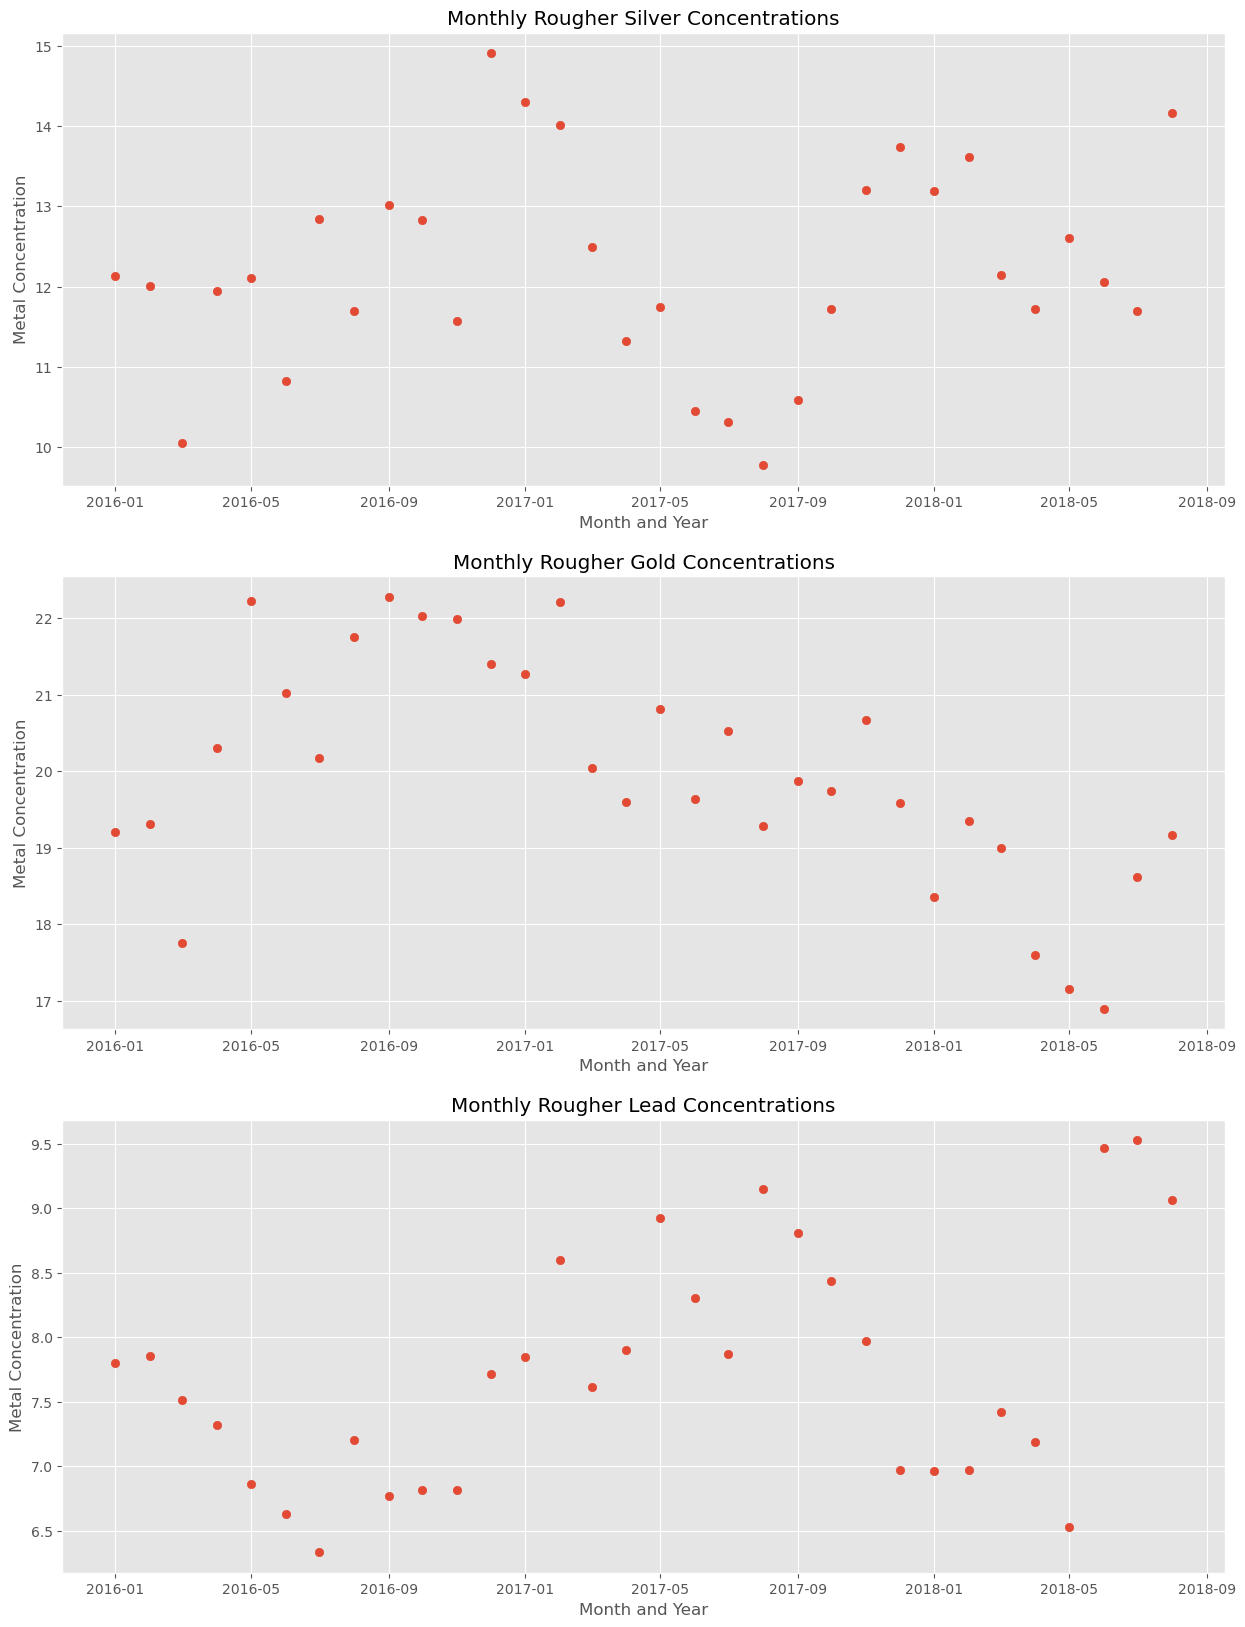

In [225]:
initial_output_concentration = concentration_change(gold_data_full, 'rougher.output.concentrate_ag', 'rougher.output.concentrate_au', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'Monthly Rougher Silver Concentrations', 'Monthly Rougher Gold Concentrations', 'Monthly Rougher Lead Concentrations')

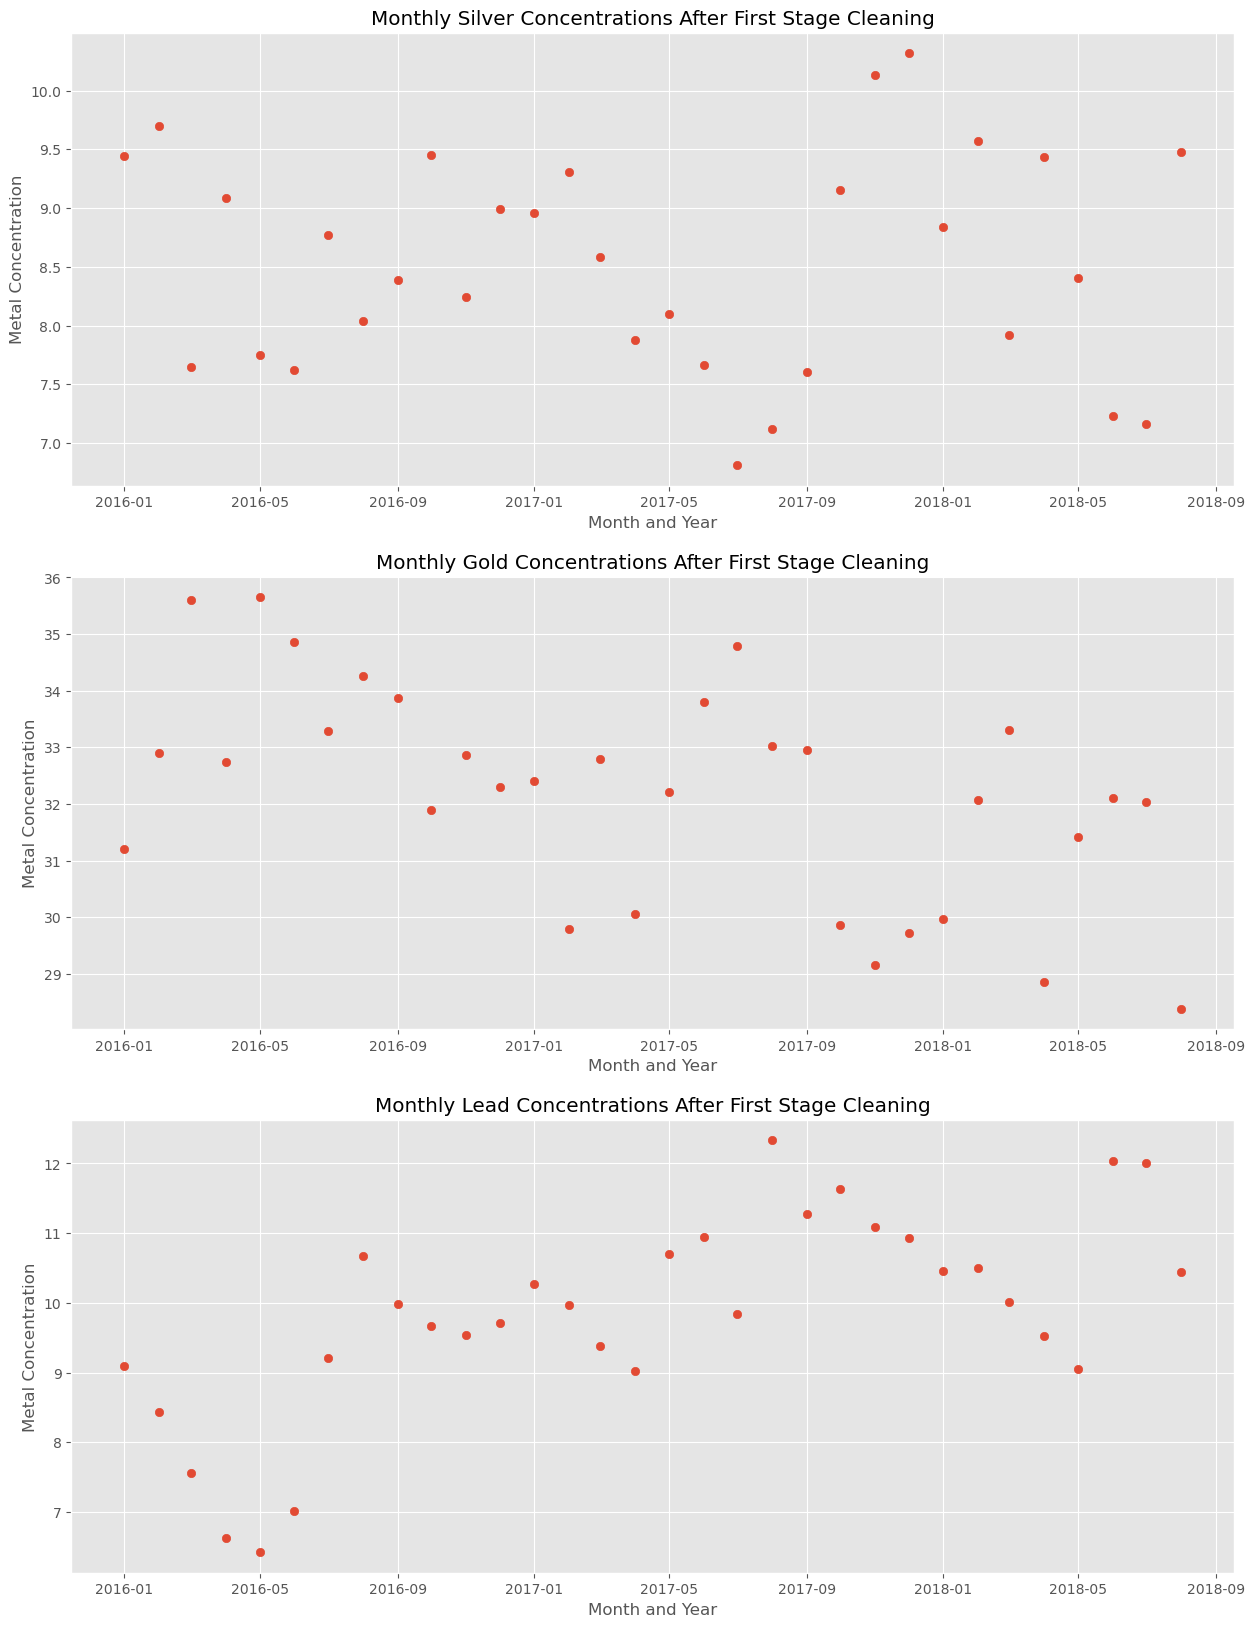

In [226]:
primary_output_concentration = concentration_change(gold_data_full, 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'Monthly Silver Concentrations After First Stage Cleaning', 'Monthly Gold Concentrations After First Stage Cleaning', 'Monthly Lead Concentrations After First Stage Cleaning')

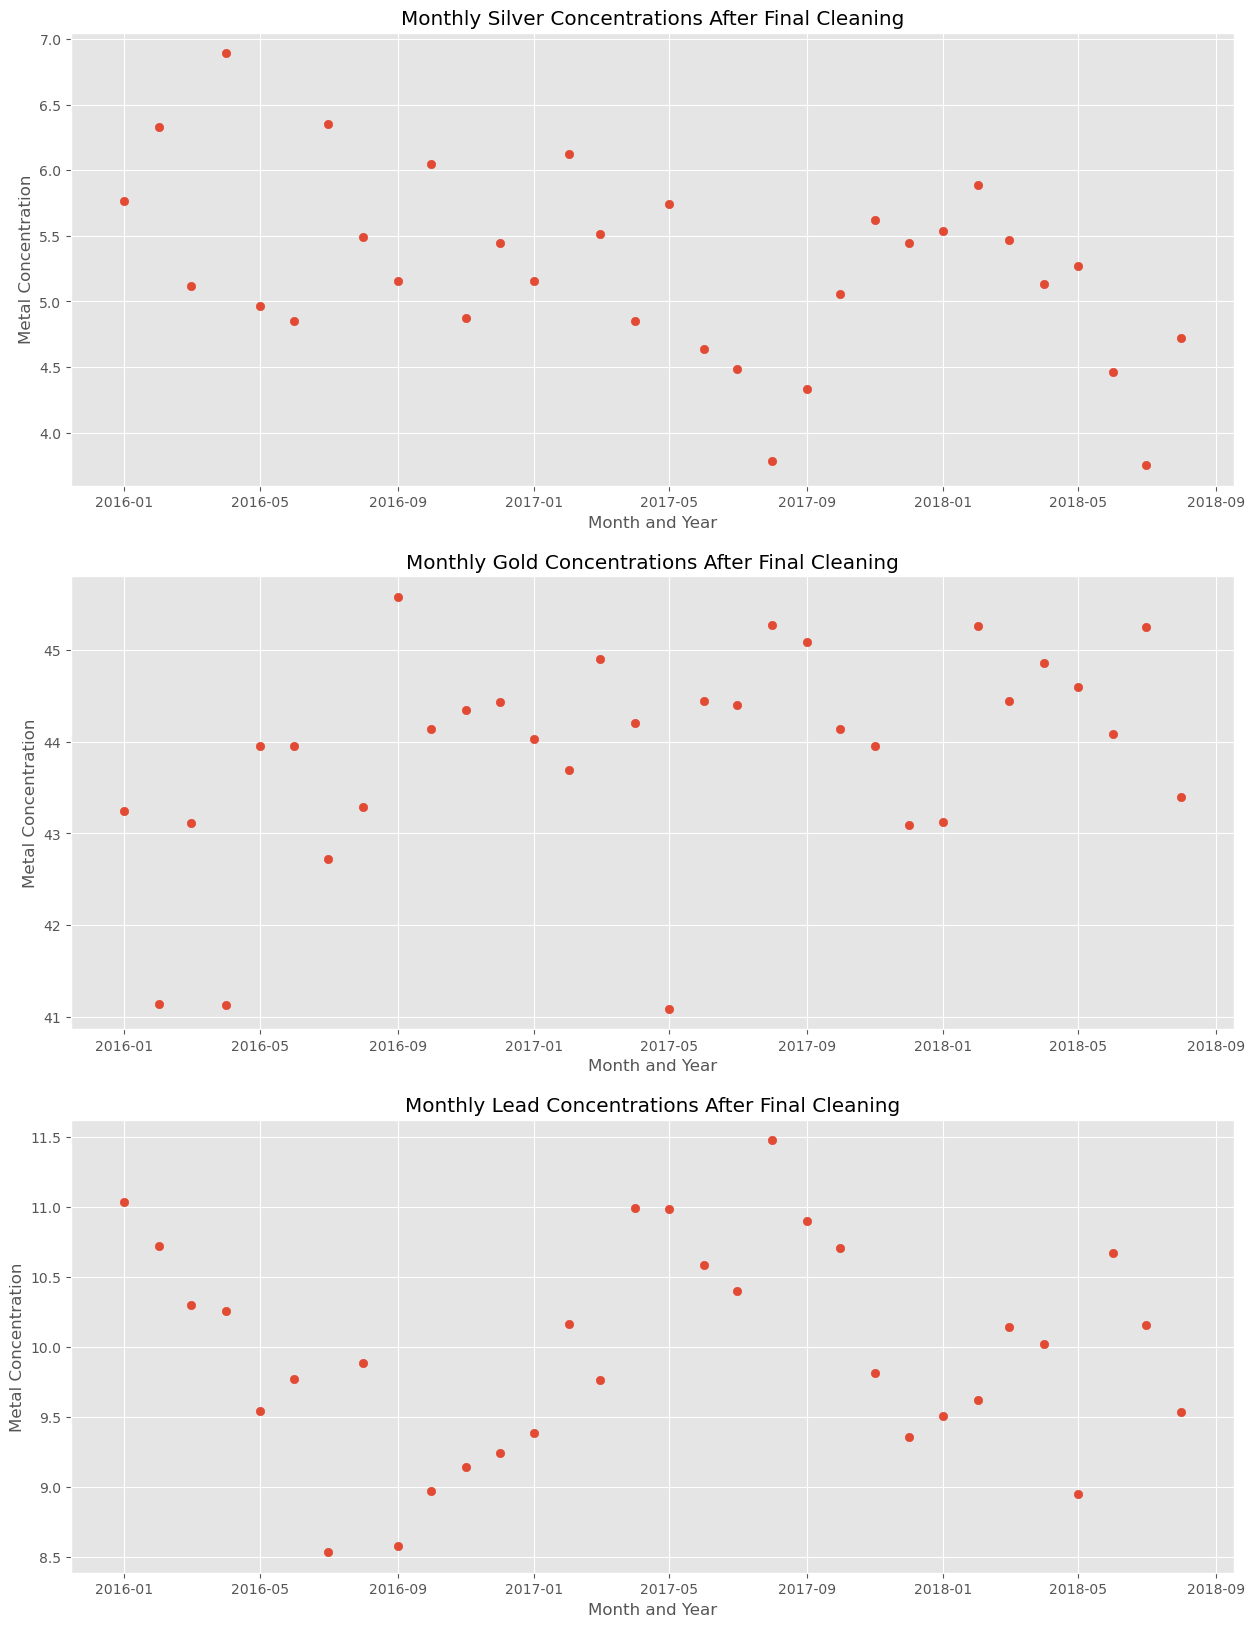

In [227]:
final_output_concentration = concentration_change(gold_data_full, 'final.output.concentrate_ag', 'final.output.concentrate_au', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'Monthly Silver Concentrations After Final Cleaning', 'Monthly Gold Concentrations After Final Cleaning', 'Monthly Lead Concentrations After Final Cleaning')

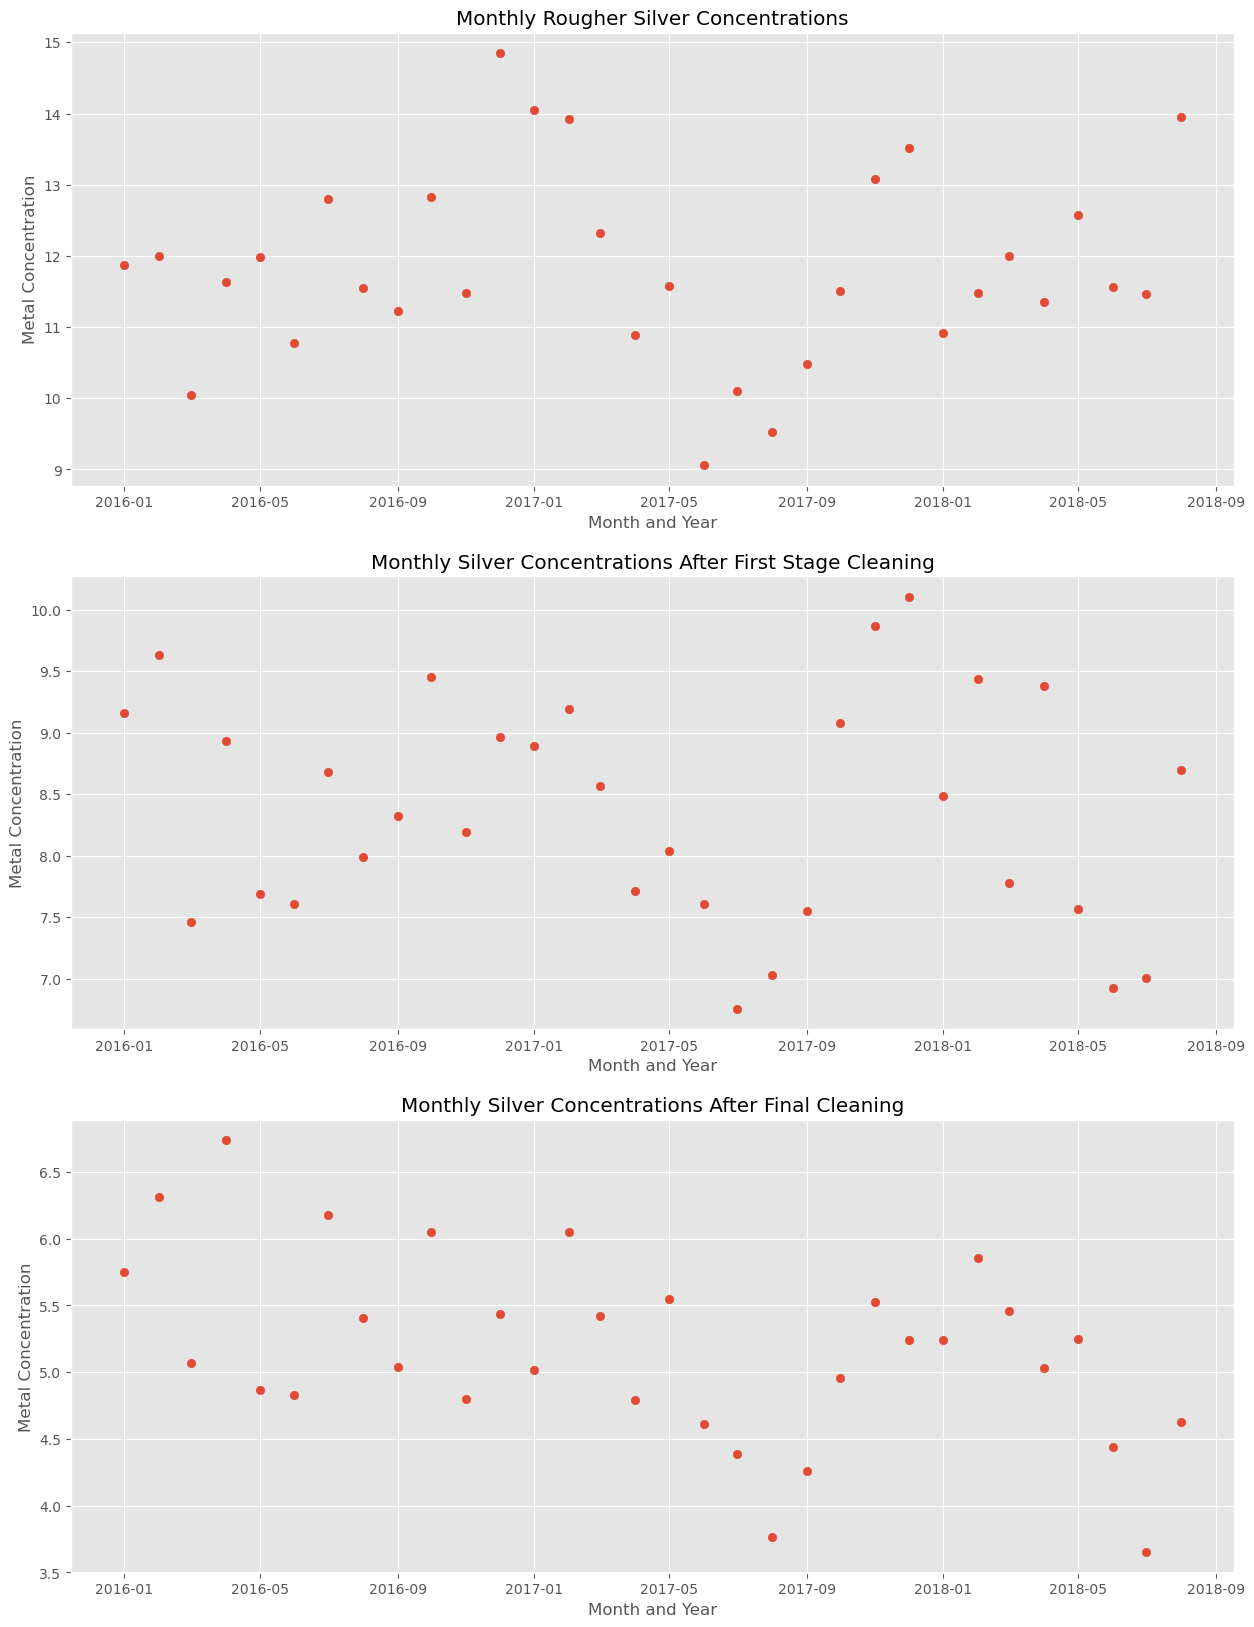

,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag,rougher.output.concentrate_sol,month_year
0,0.000000,0.000000,0.000000,0.000000,2018-01-01
1,0.000000,0.000000,0.218529,0.000000,2016-09-01
2,0.000000,0.000000,0.559972,0.000000,2018-01-01
3,0.000000,0.000000,0.722243,0.000000,2017-05-01
4,0.000000,0.000000,1.912344,0.000000,2017-04-01
...,...,...,...,...,...
20809,21.526209,9.009383,5.356689,32.764754,2016-06-01
20810,21.725695,10.777548,6.532301,32.133449,2016-06-01
20811,22.191463,4.891782,0.000000,28.292371,2017-05-01
20812,23.899102,2.181305,0.230303,29.920962,2016-07-01


In [228]:
concentration_change(gold_data_full, 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag', 'rougher.output.concentrate_sol', 'Monthly Rougher Silver Concentrations', 'Monthly Silver Concentrations After First Stage Cleaning', 'Monthly Silver Concentrations After Final Cleaning')

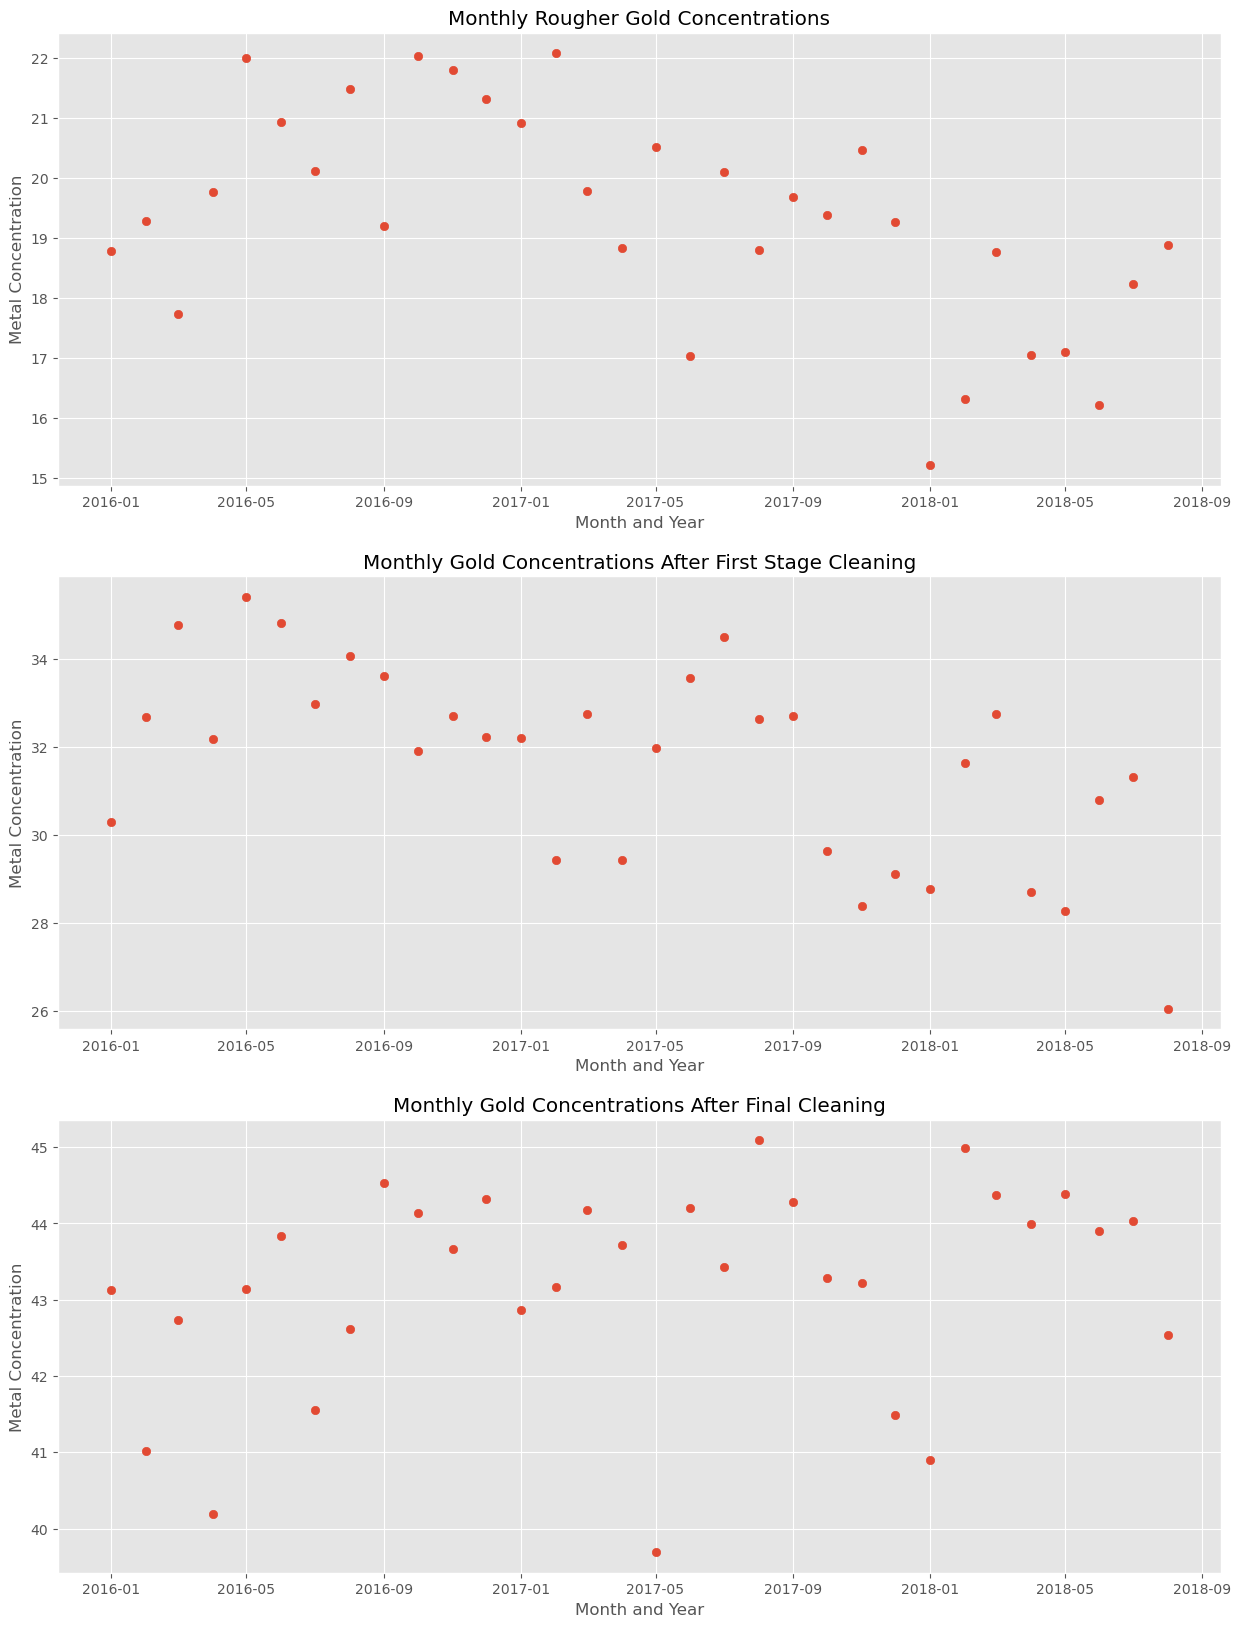

,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au,rougher.output.concentrate_sol,month_year
0,0.000000,0.000000,0.000000,0.000000,2018-01-01
1,0.000000,0.000000,0.247951,0.000000,2016-09-01
2,0.000000,0.000000,1.557696,0.000000,2018-01-01
3,0.000000,0.000000,3.768342,0.000000,2017-04-01
4,0.000000,0.000000,5.604620,0.000000,2017-05-01
...,...,...,...,...,...
20808,28.146838,40.586376,48.135335,37.833359,2016-06-01
20809,28.173199,39.900360,0.000000,36.175735,2016-07-01
20810,28.464601,41.363180,49.776535,35.035673,2016-11-01
20811,28.522811,41.208751,3.059388,35.887558,2016-07-01


In [229]:
concentration_change(gold_data_full, 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au', 'rougher.output.concentrate_sol', 'Monthly Rougher Gold Concentrations', 'Monthly Gold Concentrations After First Stage Cleaning', 'Monthly Gold Concentrations After Final Cleaning')

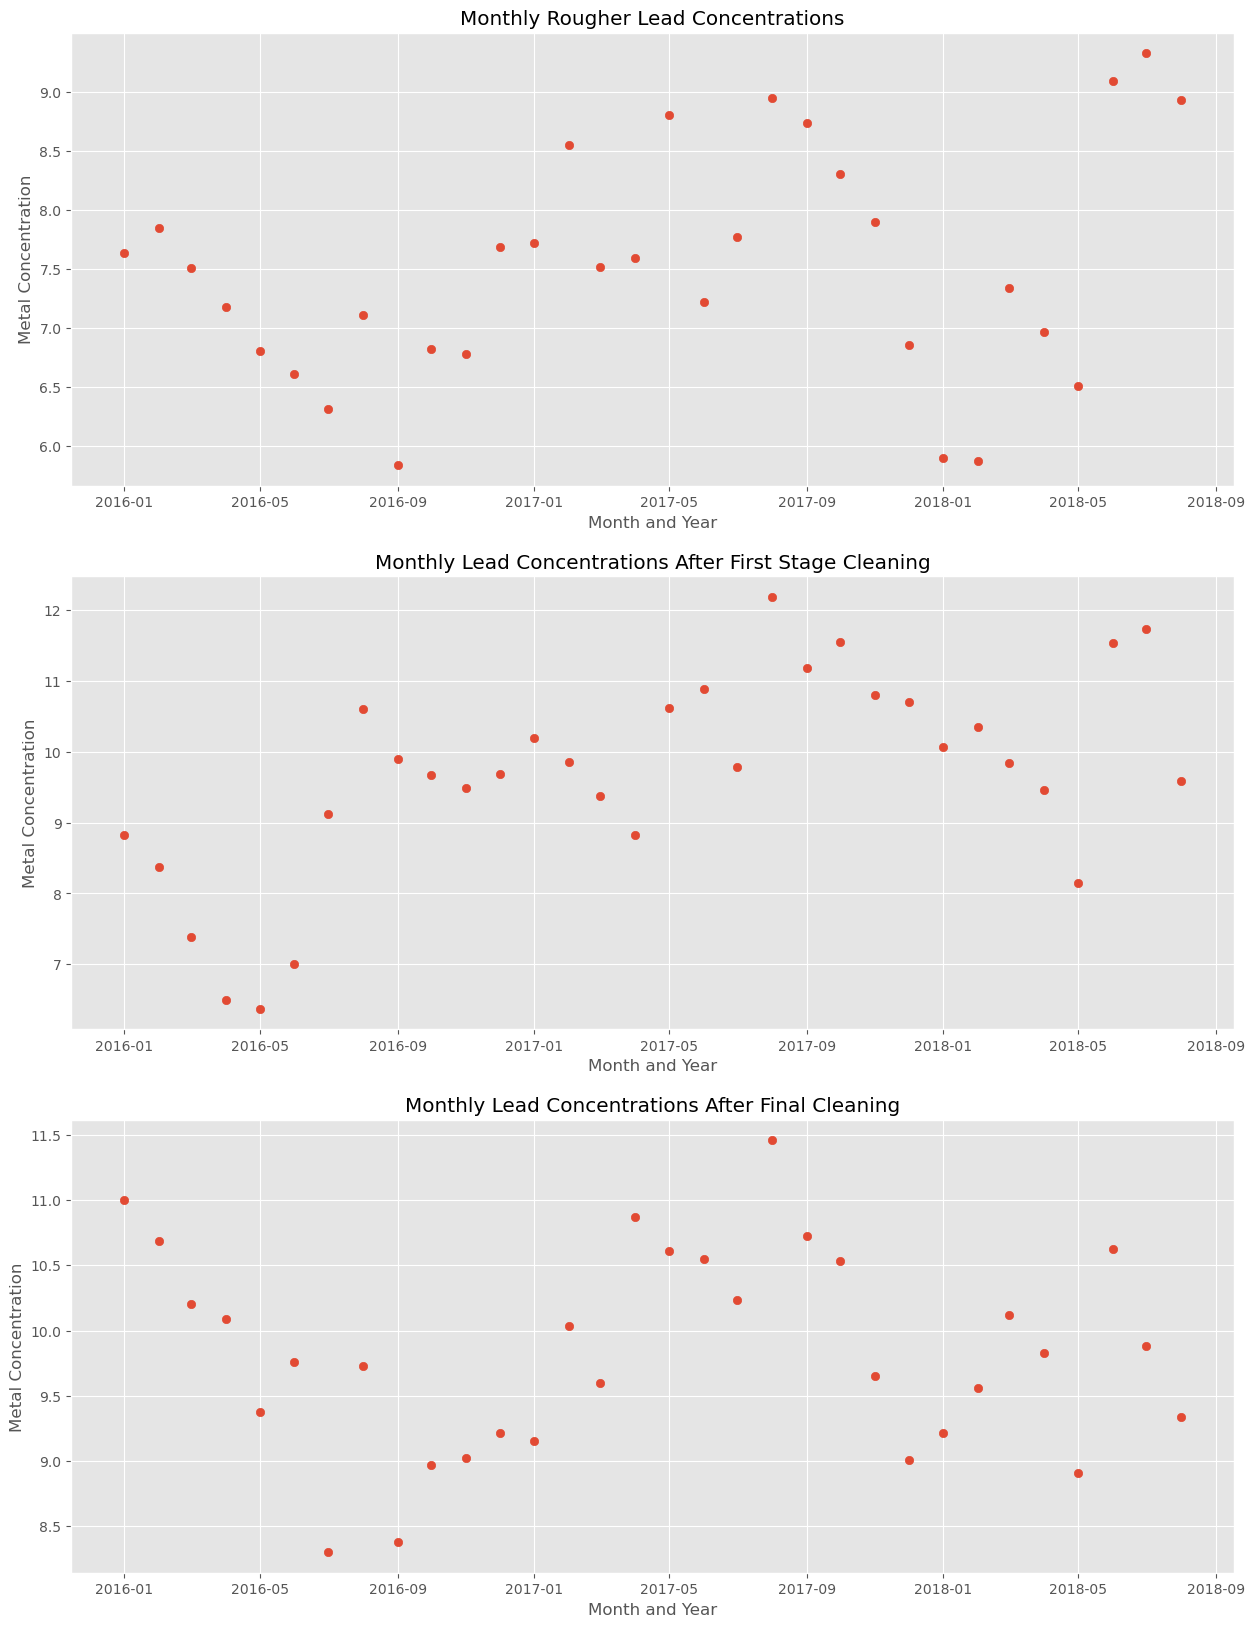

,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb,rougher.output.concentrate_sol,month_year
0,0.000000,0.000000,0.000000,0.000000,2018-01-01
1,0.000000,0.000000,0.284835,0.000000,2016-09-01
2,0.000000,0.000000,0.760722,0.000000,2018-01-01
3,0.000000,0.000000,1.370248,0.000000,2017-05-01
4,0.000000,0.000000,1.826746,0.000000,2017-04-01
...,...,...,...,...,...
20776,15.323901,0.000000,0.000000,18.809153,2016-02-01
20777,15.389648,0.010000,12.014648,23.404297,2018-07-01
20778,15.389648,0.666604,9.914774,23.719141,2018-07-01
20779,18.133311,8.921110,0.000000,28.292371,2017-05-01


In [230]:
concentration_change(gold_data_full, 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb', 'rougher.output.concentrate_sol', 'Monthly Rougher Lead Concentrations', 'Monthly Lead Concentrations After First Stage Cleaning', 'Monthly Lead Concentrations After Final Cleaning')

2.2. Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect.

In [231]:
def particle_size(df, column_4, titlename_1):
    
    particle = df.groupby([column_4])['date'].max()
    particle = particle.reset_index().rename(columns={column_4:column_4, 'date': 'date'})
    particle['month_year'] = particle['date'].dt.to_period('M')
    particle['month_year'] = particle['month_year'].dt.to_timestamp()
    particle.drop(['date'], axis=1, inplace=True)

    particle_1 = particle.groupby('month_year')[column_4].mean()
    particle_1 = particle_1.reset_index().rename(columns={column_4:column_4, 'month_year': 'month_year'})
    particle_1 = particle_1.sort_values(by=column_4, ascending=False).head(20)

    particle_1.plot(kind='bar',
                    x='month_year',
                    y=column_4,
                    title=titlename_1,
                    xlabel='Month and Year',
                    ylabel='Particle Size',
                    figsize=(15,20))

    plt.show()

    return

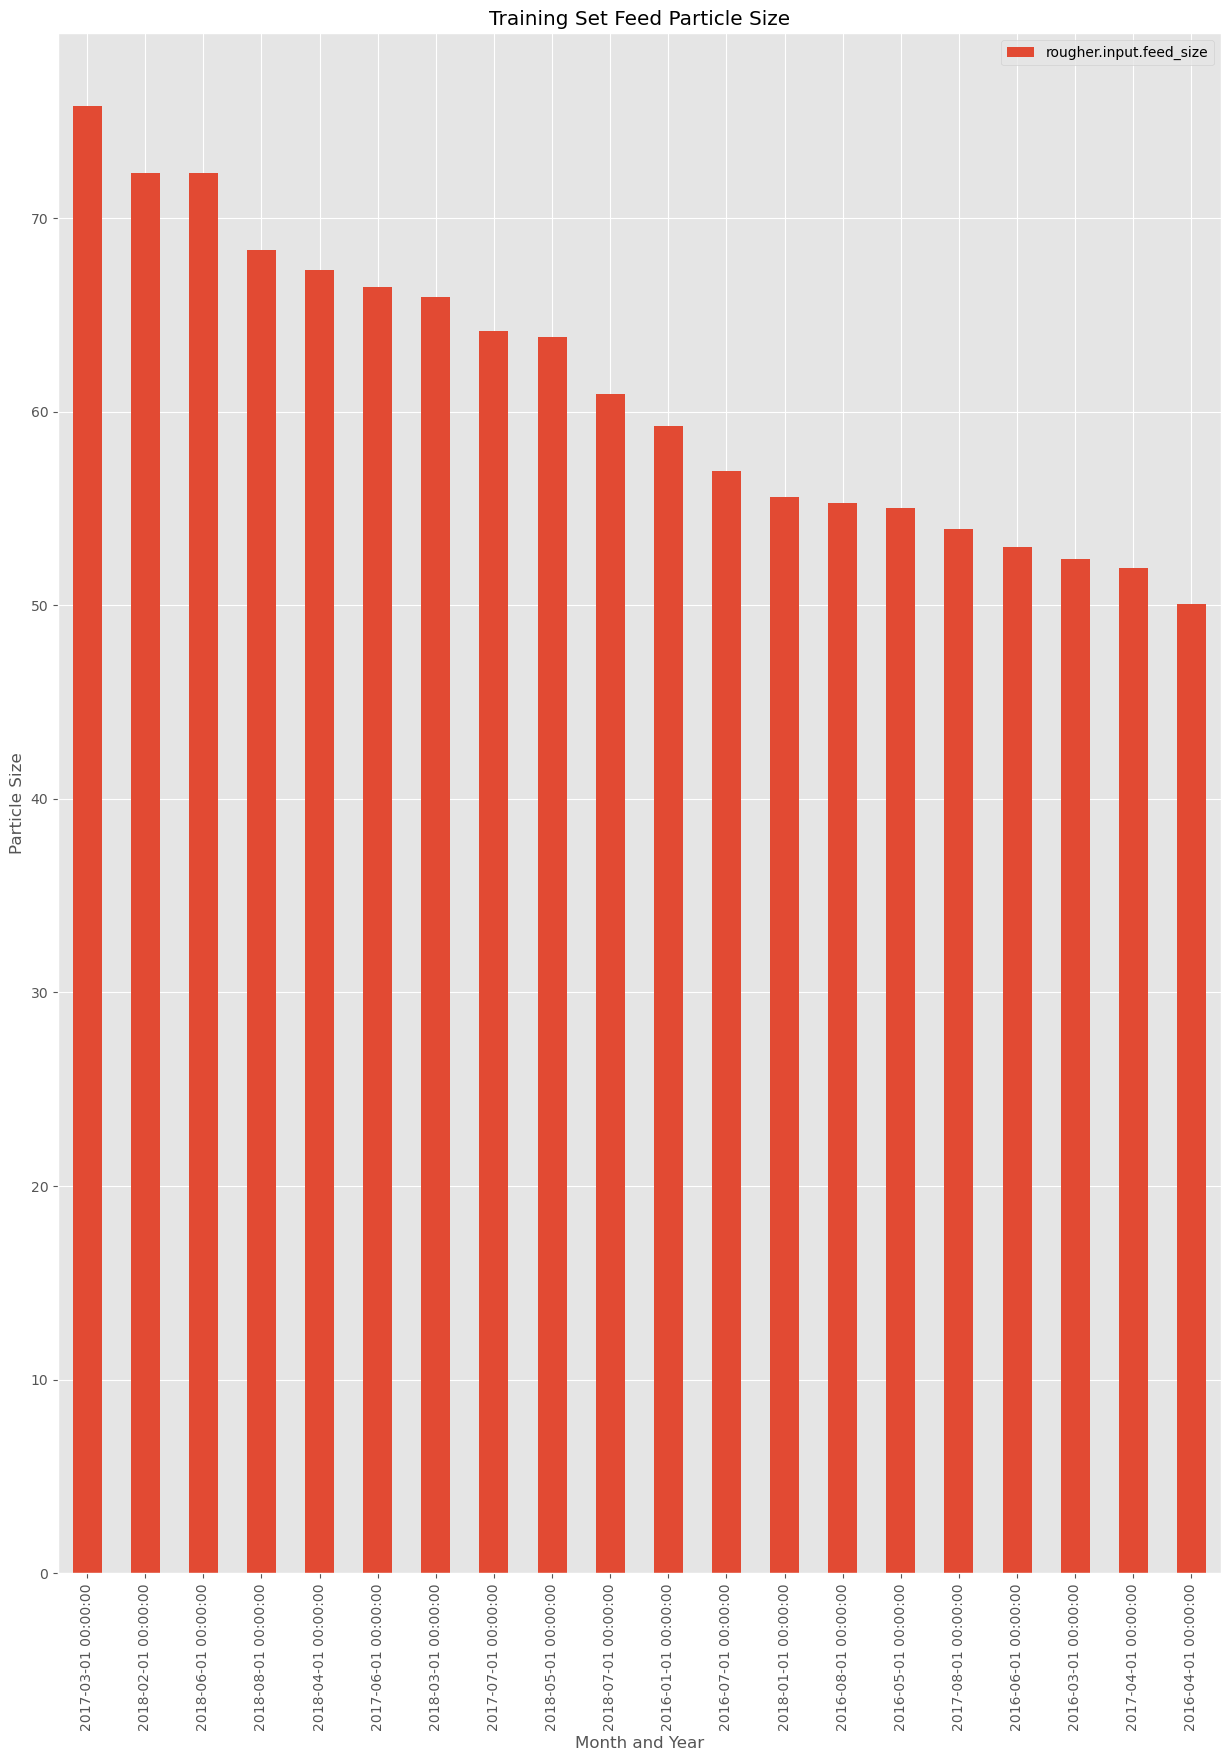

In [232]:
particle_size(gold_data_train, 'rougher.input.feed_size', 'Training Set Feed Particle Size')

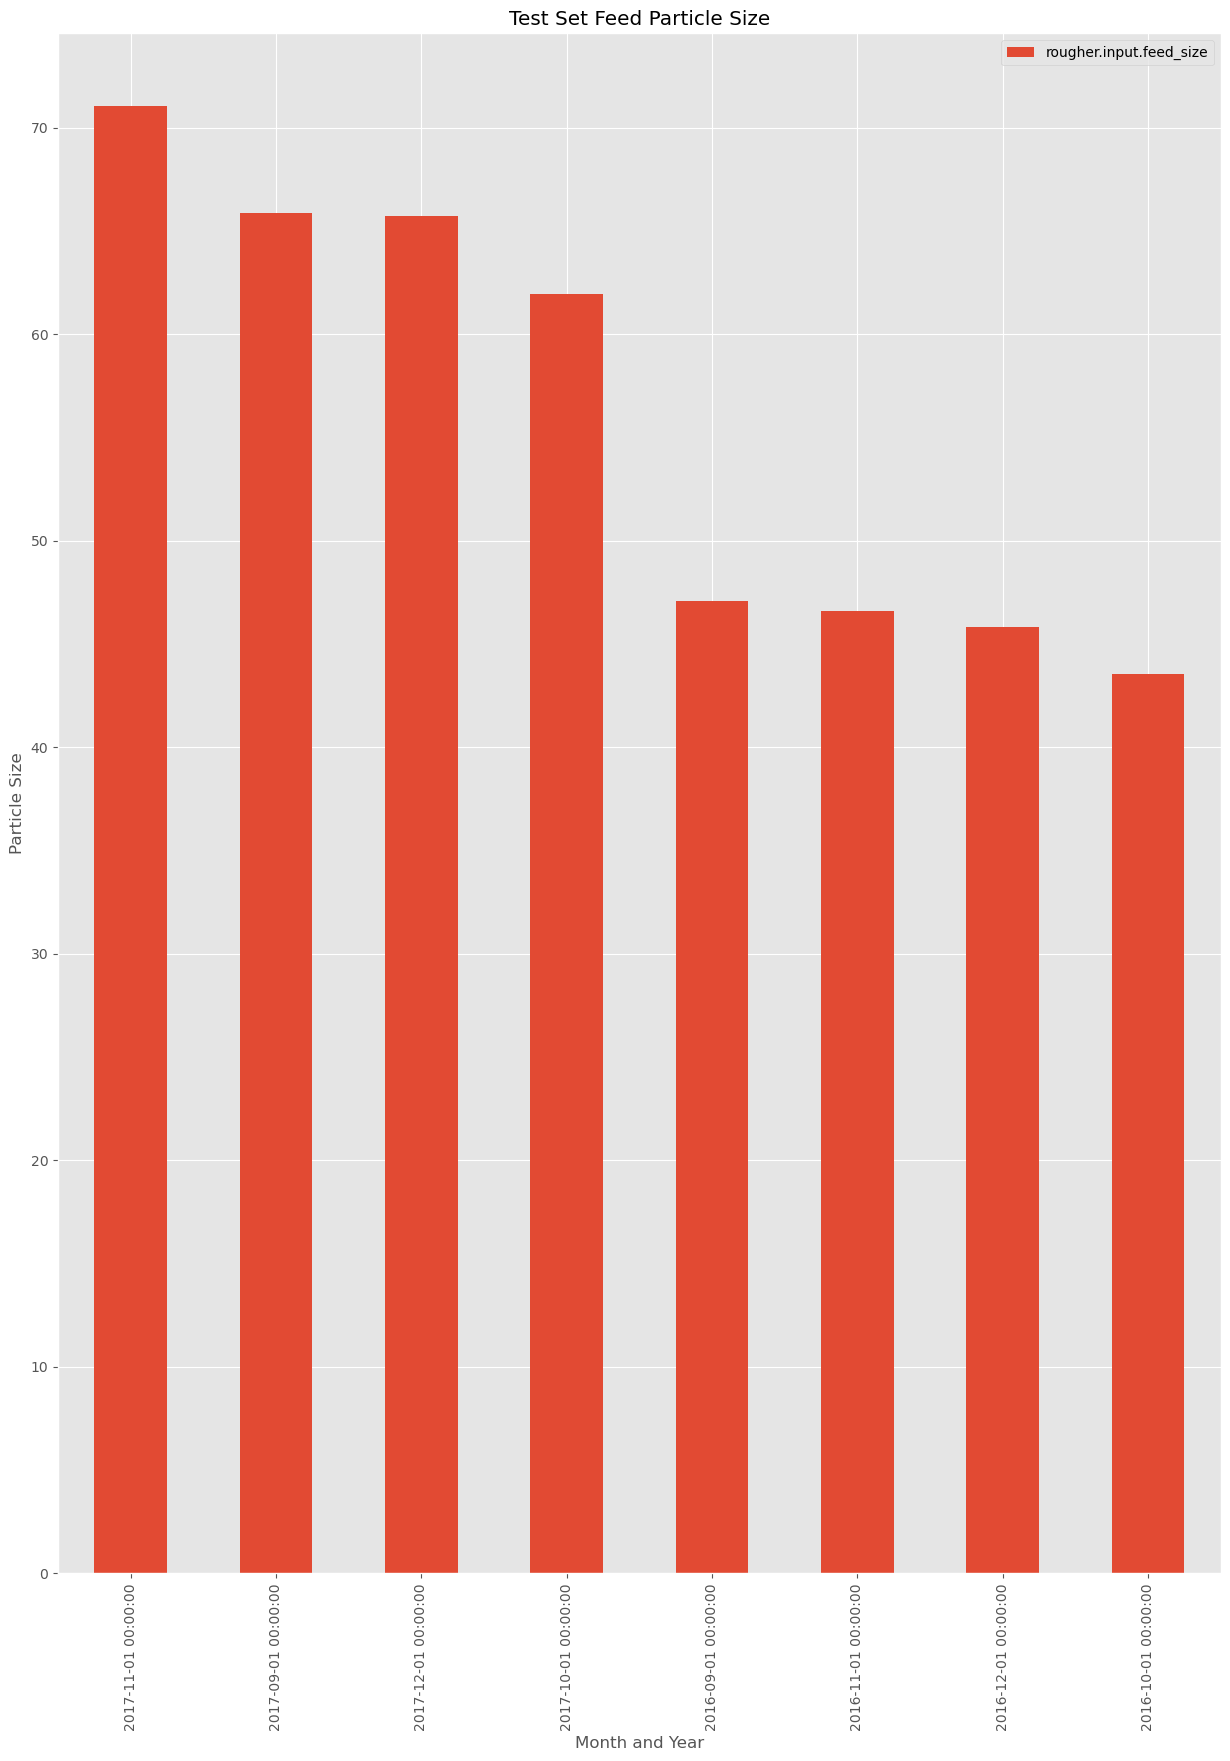

In [233]:
particle_size(gold_data_test, 'rougher.input.feed_size', 'Test Set Feed Particle Size')

2.3. Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies.

In [245]:
#gold_data_full.info()
def total_concentration(concentration_change, titlename_1, titlename_2):

    tot_concentration = concentration_change

    tot_concentration = tot_concentration.apply(pd.to_numeric)

        
    tot_concentration['total_concentration'] = tot_concentration.iloc[0:4].sum(axis=1)
    tot_concentration_1 = tot_concentration.groupby('month_year')['total_concentration'].sum()
    tot_concentration_1 = tot_concentration_1.reset_index().rename(columns={'total_concentration':'total_concentration', 'month_year':'month_year'})

    concentrate_mean = tot_concentration_1['total_concentration'].mean()
    concentrate_median = tot_concentration_1['total_concentration'].median()
    concentrate_mode = tot_concentration_1['total_concentration'].mode()
    concentrate_max = tot_concentration_1['total_concentration'].max()
    concentrate_min = tot_concentration_1['total_concentration'].min()

    tot_concentration_1_filtered = tot_concentration_1

    tot_concentration_1_filtered['total_concentration'] = tot_concentration_1_filtered['total_concentration'].drop_duplicates()

    fig, axs = plt.subplots(2, 2, figsize=(15, 15))
    
    axs[0, 0].hist(tot_concentration_1, bins=10)
    axs[0, 0].set_title(titlename_1)

    axs[0, 1].hist(tot_concentration_1_filtered, bins=10)
    axs[0, 1].set_title(titlename_2)

    axs[1, 0].boxplot(tot_concentration_1)

    axs[1, 1].boxplot(tot_concentration_1_filtered)

    plt.show()

    print(f'The substance concentrate mean is {concentrate_mean}. The substance concentrate median is {concentrate_median}. The substance concentrate mode is {concentrate_mode}. The maximum concentrate value is {concentrate_max}. The minimum concentrate value is {concentrate_min}.')

    return

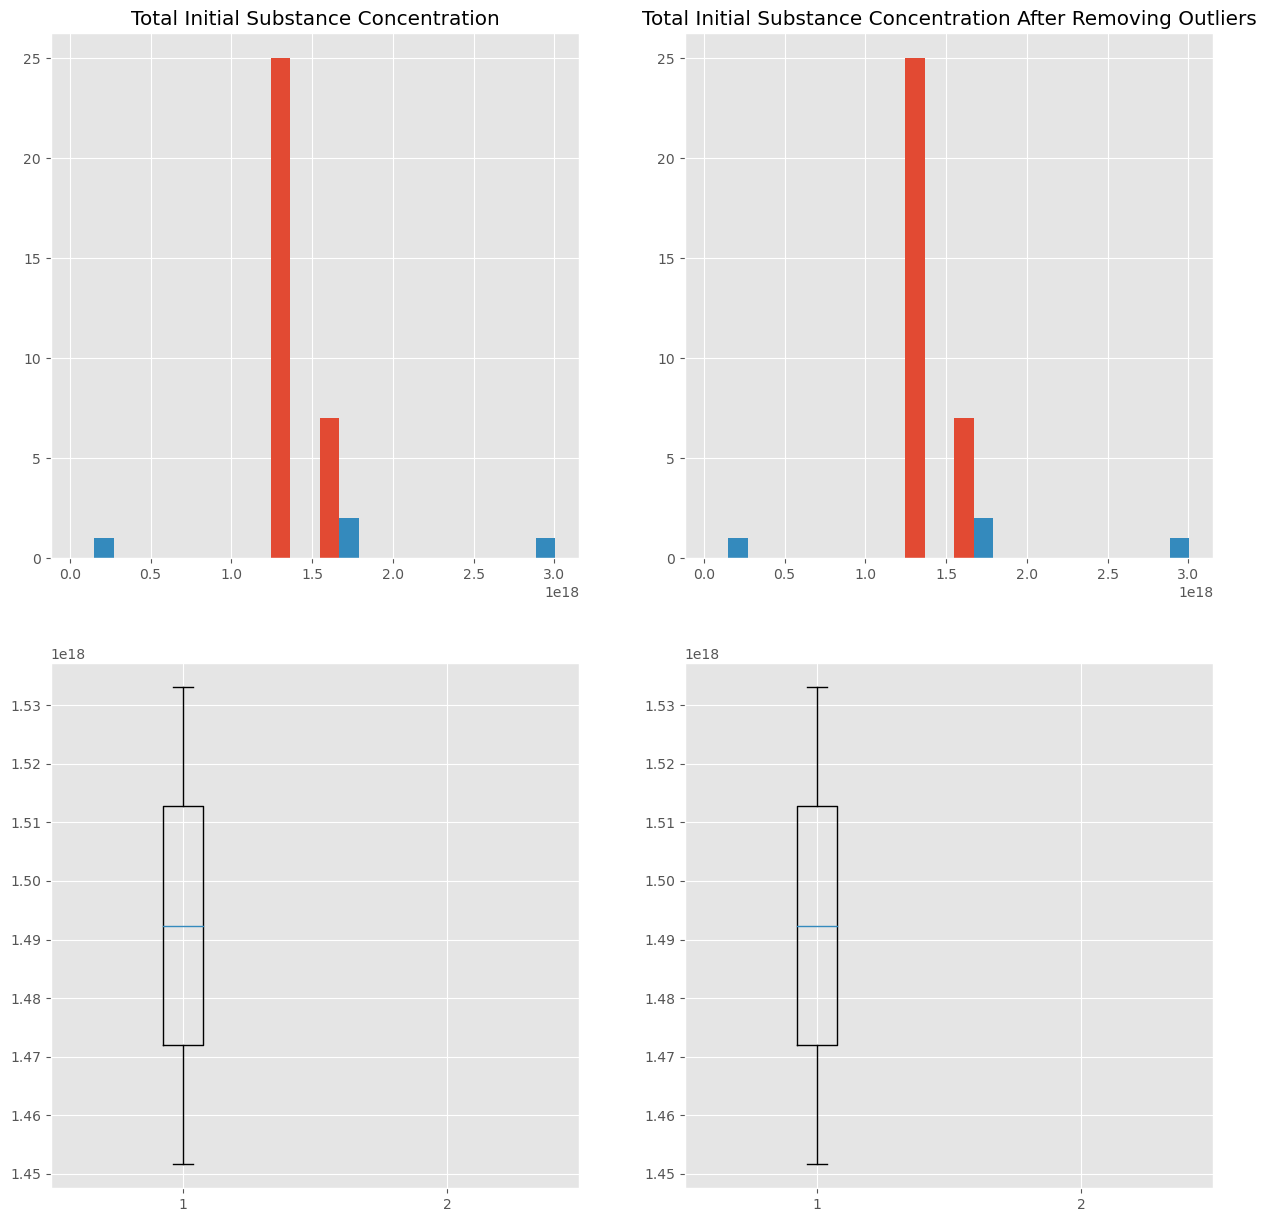

The substance concentrate mean is 1.904094e+17. The substance concentrate median is 0.0. The substance concentrate mode is 0    0.0
Name: total_concentration, dtype: float64. The maximum concentrate value is 3.0348864e+18. The minimum concentrate value is 0.0.


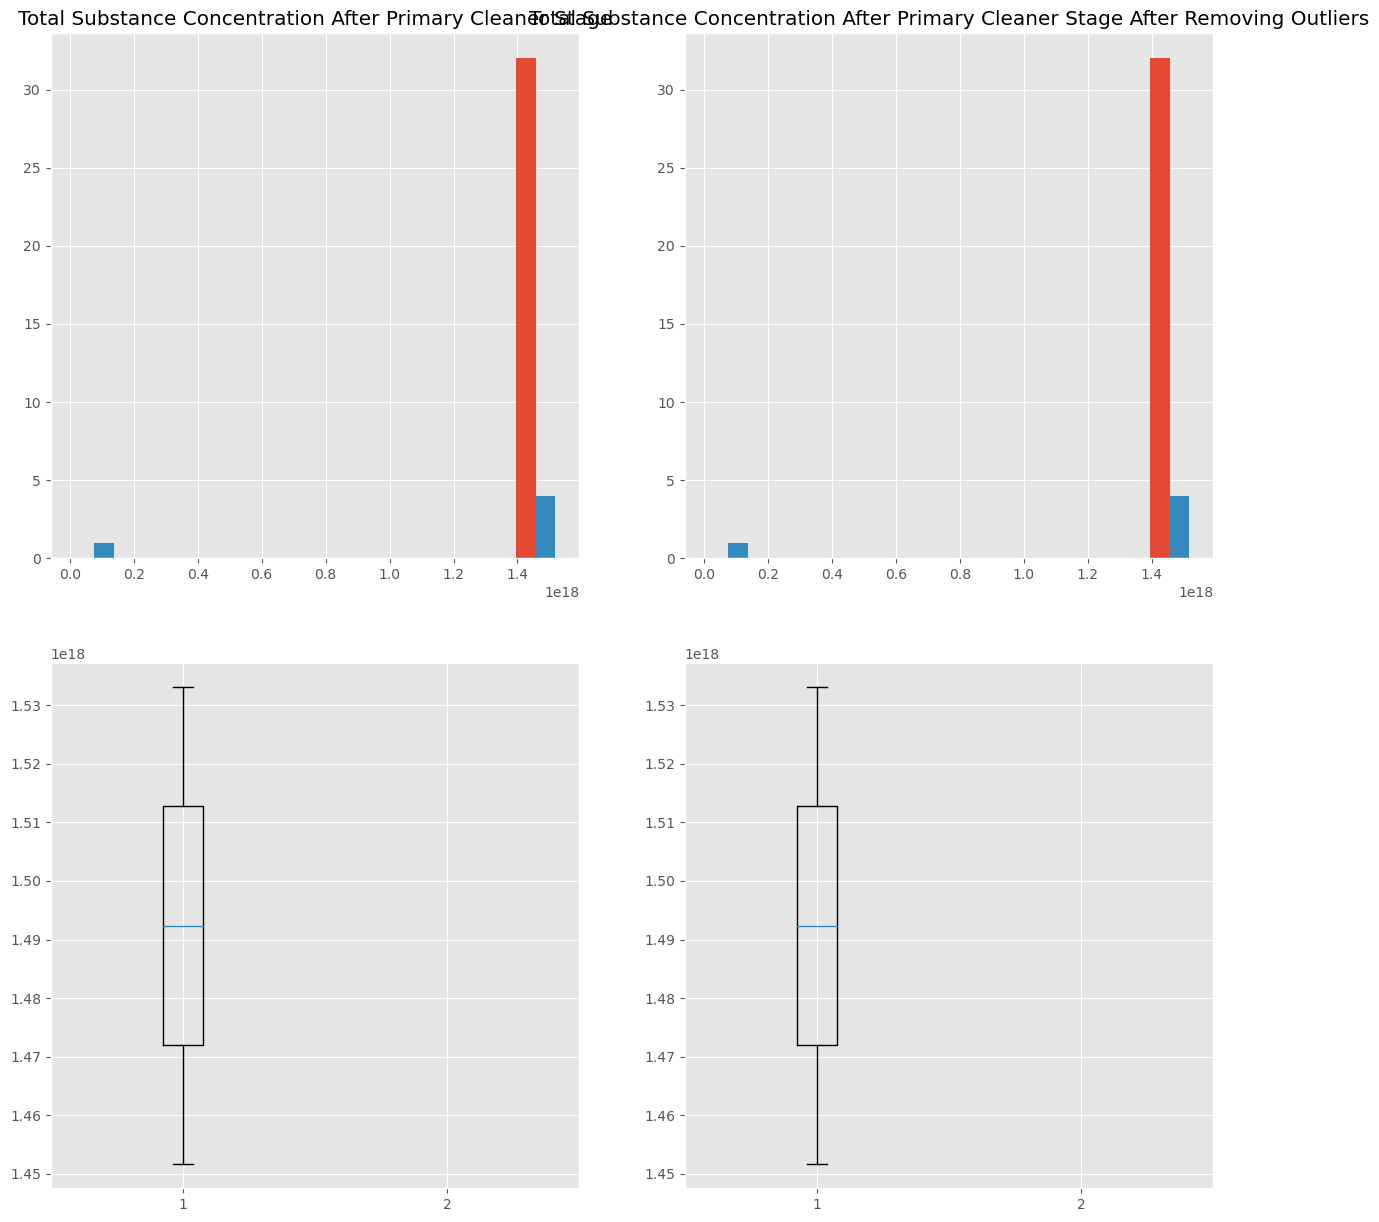

The substance concentrate mean is 1.899936e+17. The substance concentrate median is 0.0. The substance concentrate mode is 0    0.0
Name: total_concentration, dtype: float64. The maximum concentrate value is 1.5330816e+18. The minimum concentrate value is 0.0.


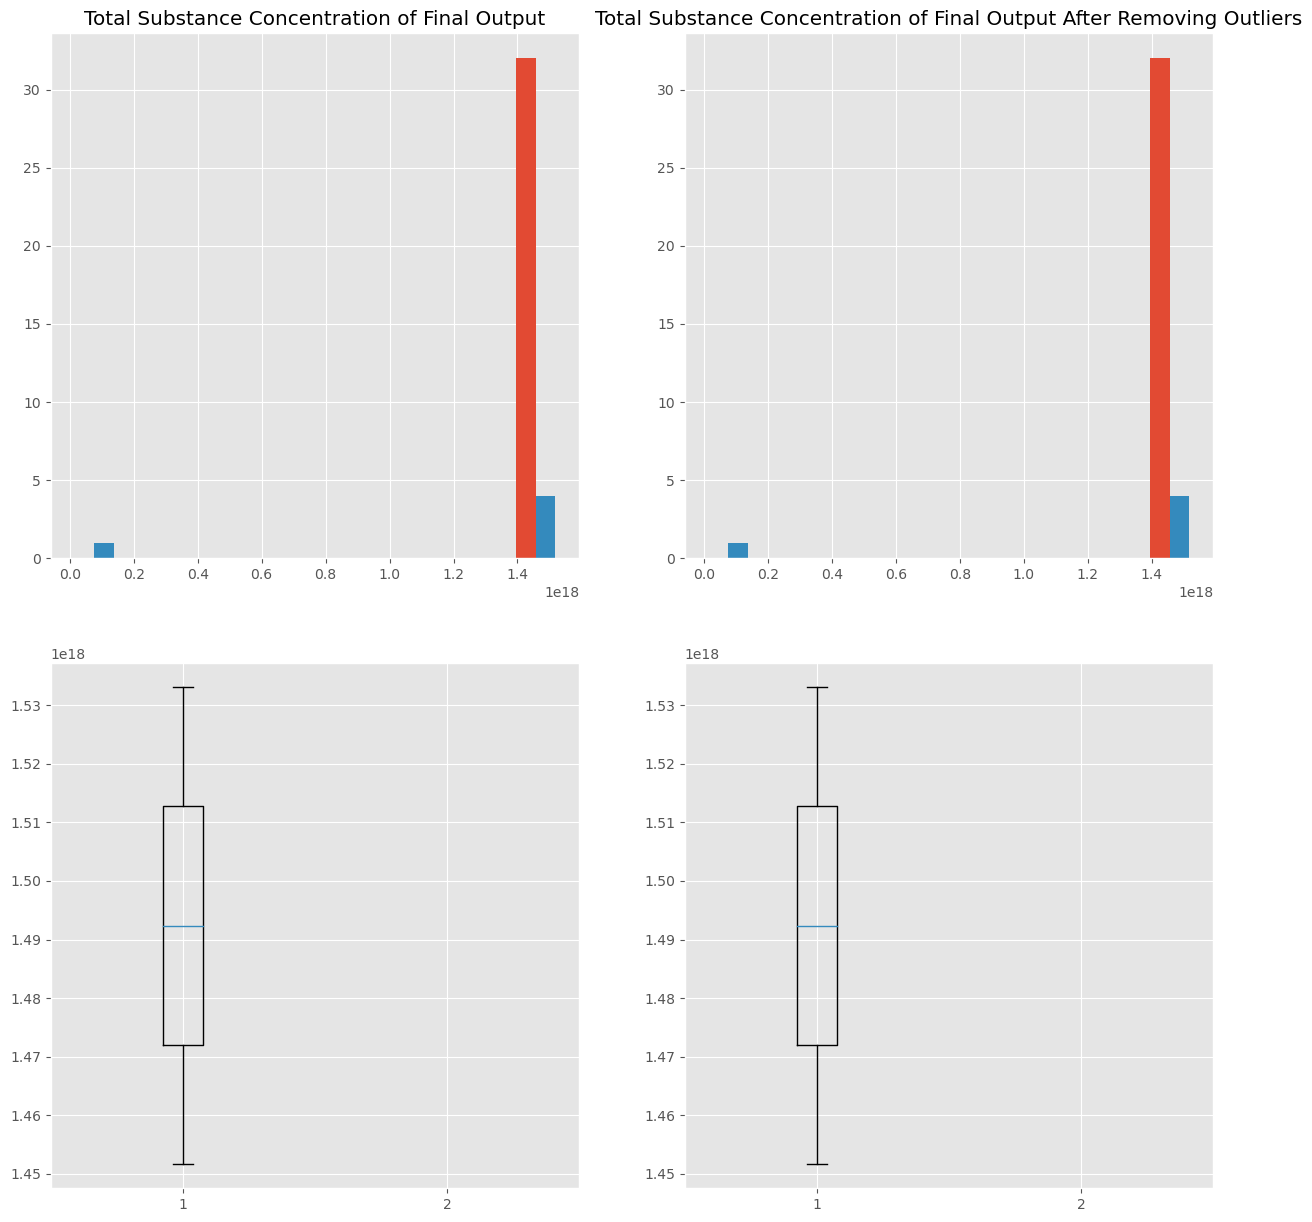

The substance concentrate mean is 1.886841e+17. The substance concentrate median is 0.0. The substance concentrate mode is 0    0.0
Name: total_concentration, dtype: float64. The maximum concentrate value is 1.5330816e+18. The minimum concentrate value is 0.0.


In [246]:
total_concentration(initial_output_concentration, 'Total Initial Substance Concentration', 'Total Initial Substance Concentration After Removing Outliers')

total_concentration(primary_output_concentration, 'Total Substance Concentration After Primary Cleaner Stage', 'Total Substance Concentration After Primary Cleaner Stage After Removing Outliers')

total_concentration(final_output_concentration, 'Total Substance Concentration of Final Output', 'Total Substance Concentration of Final Output After Removing Outliers')



3.1. Write a function to calculate the final sMAPE value.

3.2. Train different models. Evaluate them using cross-validation. Pick the best model and test it using the test sample. Provide findings.

In [ ]:
def sMAPE(predicted, actual):
   sMAPE_value =  100/len(actual) * np.sum(np.abs(predicted - actual) / (np.abs(actual) + np.abs(predicted))/2)
   return sMAPE_value

def sMAPE_final(calculate):
    sMAPE_final_value = (calculate * 0.25) + (calculate * 0.75)
    return(sMAPE_final_value)

In [ ]:
#Splitting the data
gold_data1, gold_valid = train_test_split (gold_data_full, test_size=0.20, train_size = 0.80, random_state=54321, shuffle=True)
gold_train, gold_test = train_test_split (gold_data1, test_size=0.25, train_size = 0.75, random_state=54321, shuffle=True)

rougher_features_train = gold_train.drop(['rougher.output.recovery', 'date'], axis=1)
rougher_target_train = gold_train['rougher.output.recovery']
rougher_features_valid = gold_valid.drop(['rougher.output.recovery', 'date'], axis=1)
rougher_target_valid = gold_valid['rougher.output.recovery']
rougher_features_test = gold_test.drop(['rougher.output.recovery', 'date'], axis=1)
rougher_target_test = gold_test['rougher.output.recovery']

final_features_train = gold_train.drop(['final.output.recovery', 'date'], axis=1)
final_target_train = gold_train['final.output.recovery']
final_features_valid = gold_valid.drop(['final.output.recovery', 'date'], axis=1)
final_target_valid = gold_valid['final.output.recovery']
final_features_test = gold_test.drop(['final.output.recovery', 'date'], axis=1)
final_target_test = gold_test['final.output.recovery']


rougher_features_train.info()
rougher_target_train.info()





In [ ]:
for depth in range(1, 300, 10):
    rougher_model = DecisionTreeRegressor(random_state=54321, max_depth=depth)
    rougher_model.fit(rougher_features_train, rougher_target_train)
    rougher_predictions_valid = rougher_model.predict(rougher_features_valid)
    sMAPE_rougher= sMAPE(rougher_target_train, rougher_predictions_valid)
    print('max_depth =', depth, ', sMAPE=', end='')
    print(sMAPE_rougher)